# 1. Importing Necessary Packages and Datasets 

In [1]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")



import pandas as pd 
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

from sklearn.impute import SimpleImputer
from impyute.imputation.cs import mice

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from skopt import BayesSearchCV
from sklearn.model_selection import cross_val_predict




In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

ID = test['PassengerId']

In [3]:
n_train = train.shape[0]
n_test = test.shape[0]

full_data = pd.concat((train,test), ignore_index=True)
full_data.shape

(1309, 12)

In [4]:
full_data.head()

Age Cabin Embarked     Fare  \
0  22.0   NaN        S   7.2500   
1  38.0   C85        C  71.2833   
2  26.0   NaN        S   7.9250   
3  35.0  C123        S  53.1000   
4  35.0   NaN        S   8.0500   

                                                Name  Parch  PassengerId  \
0                            Braund, Mr. Owen Harris      0            1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                             Heikkinen, Miss. Laina      0            3   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                           Allen, Mr. William Henry      0            5   

   Pclass     Sex  SibSp  Survived            Ticket  
0       3    male      1       0.0         A/5 21171  
1       1  female      1       1.0          PC 17599  
2       3  female      0       1.0  STON/O2. 3101282  
3       1  female      1       1.0            113803  
4       3    male      0       0.0            373450

# 2. Exploratory Data Analysis

In [5]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [6]:
full_data.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [7]:
full_data.describe()

Age         Fare        Parch  PassengerId       Pclass  \
count  1046.000000  1308.000000  1309.000000  1309.000000  1309.000000   
mean     29.881138    33.295479     0.385027   655.000000     2.294882   
std      14.413493    51.758668     0.865560   378.020061     0.837836   
min       0.170000     0.000000     0.000000     1.000000     1.000000   
25%      21.000000     7.895800     0.000000   328.000000     2.000000   
50%      28.000000    14.454200     0.000000   655.000000     3.000000   
75%      39.000000    31.275000     0.000000   982.000000     3.000000   
max      80.000000   512.329200     9.000000  1309.000000     3.000000   

             SibSp    Survived  
count  1309.000000  891.000000  
mean      0.498854    0.383838  
std       1.041658    0.486592  
min       0.000000    0.000000  
25%       0.000000    0.000000  
50%       0.000000    0.000000  
75%       1.000000    1.000000  
max       8.000000    1.000000

## Ticket Class

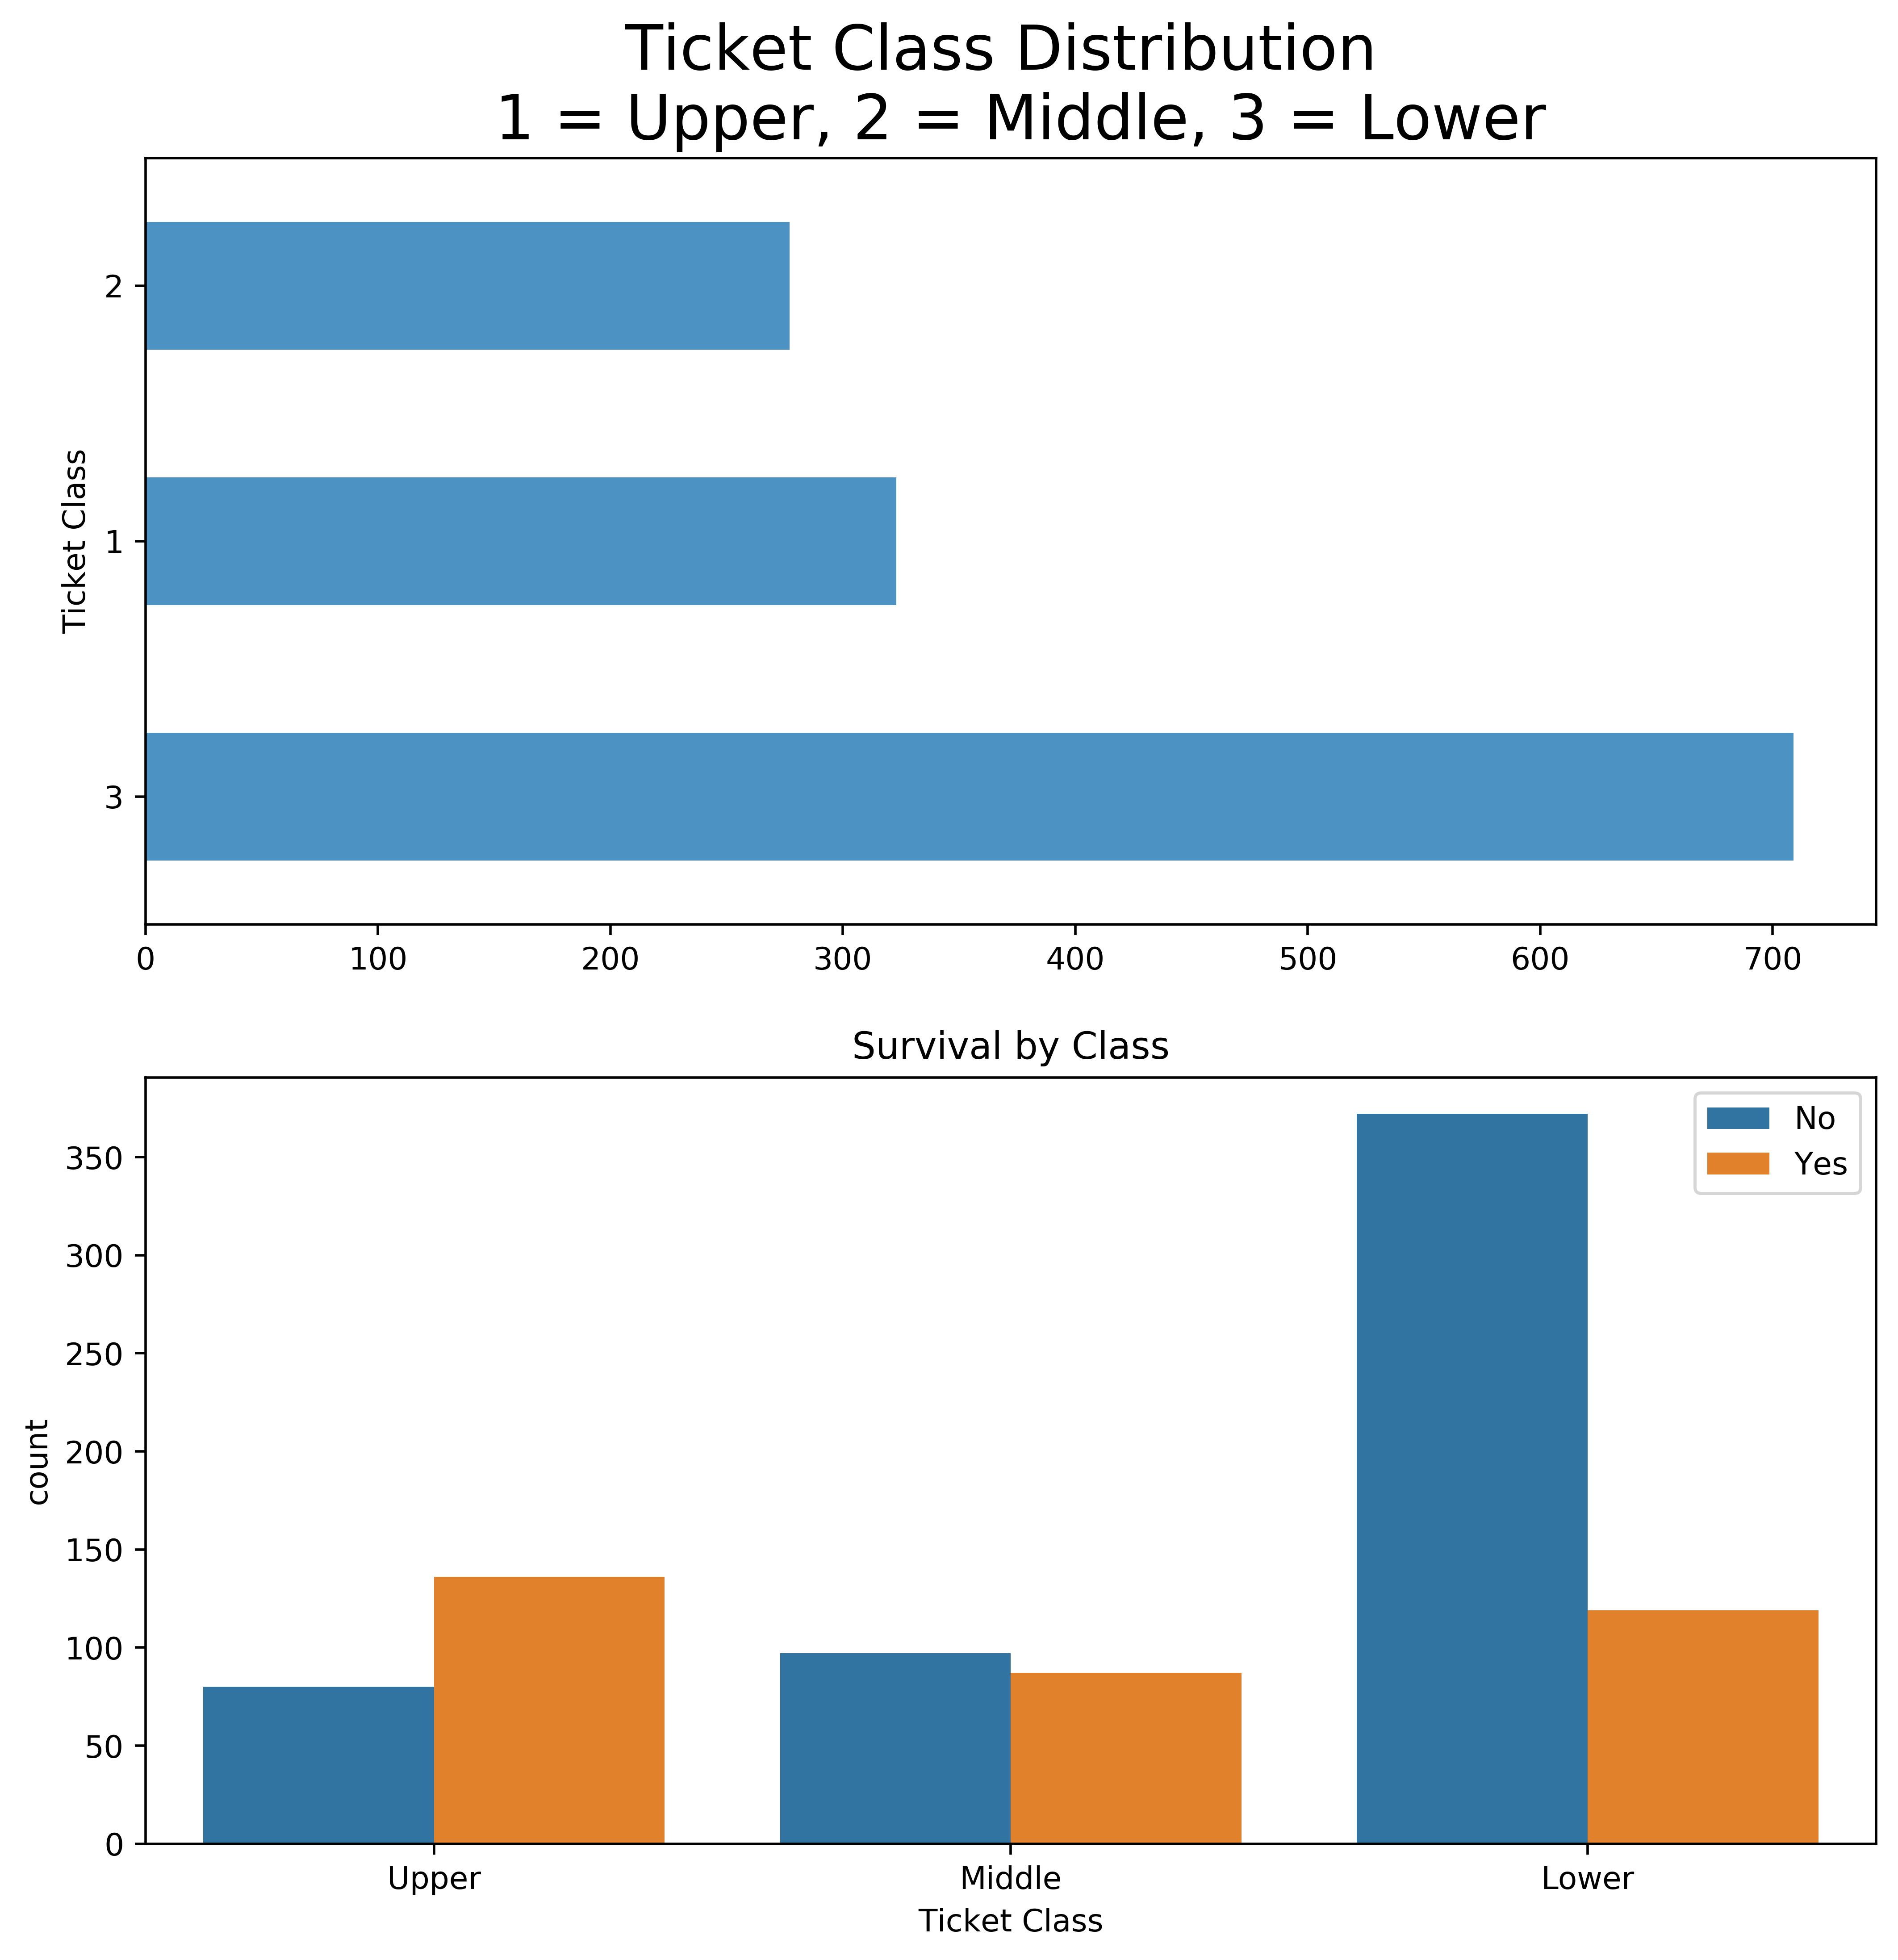

In [8]:
fig = plt.figure(figsize=(10,10), dpi=500)

ax1 = plt.subplot(2,1,1)
full_data.Pclass.value_counts().plot(kind='barh', alpha=0.8)
ax1.set_ylabel('Ticket Class')
ax1.set_title('Ticket Class Distribution \n 1 = Upper, 2 = Middle, 3 = Lower', fontsize=20)

ax2 = plt.subplot(2,1,2)
sns.countplot(x='Pclass', hue='Survived', data=full_data)
ax2.set_xlabel('Ticket Class')
ax2.set_xticklabels(['Upper', 'Middle', 'Lower'])
ax2.set_title('Survival by Class')
ax2.legend(['No','Yes'])


## Age

Text(0.5, 1.0, 'Survival by Age')

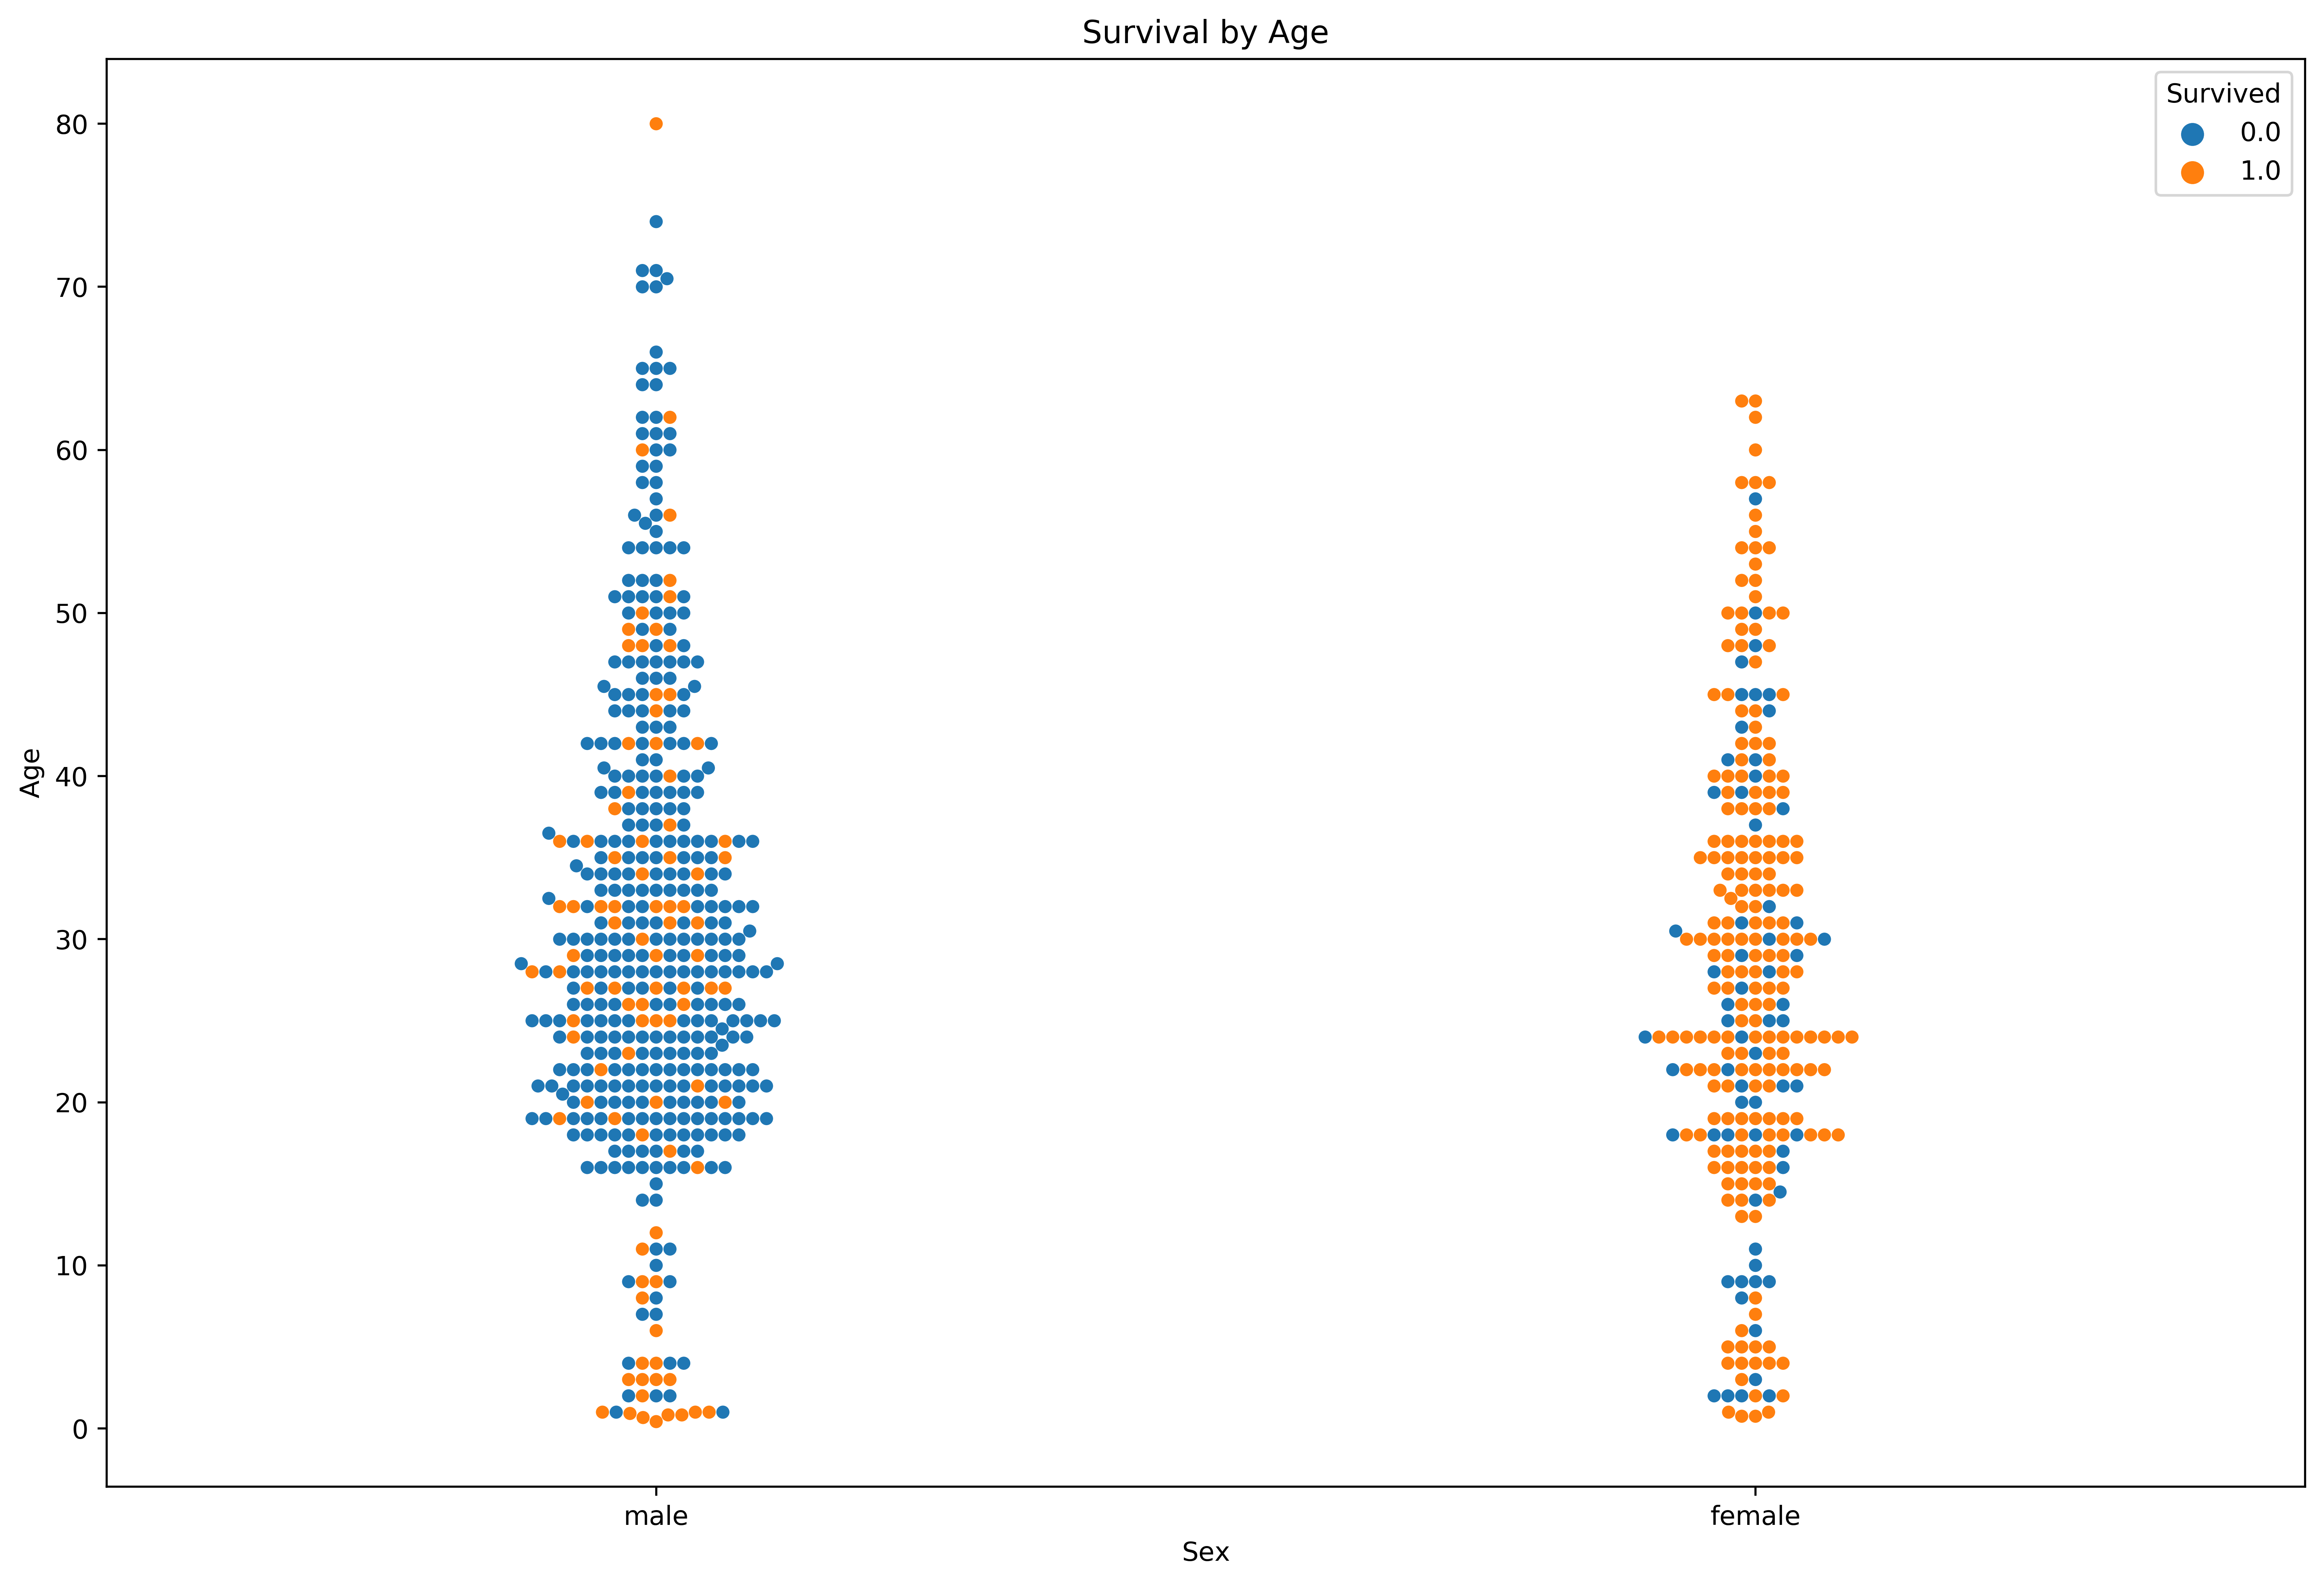

In [9]:
fig = plt.figure(figsize=(15,10), dpi=500)

sns.swarmplot(x='Sex', y='Age', hue='Survived',data=full_data)
plt.title('Survival by Age')

## Sex

Text(0.5, 1.0, 'Female Survival by Class')

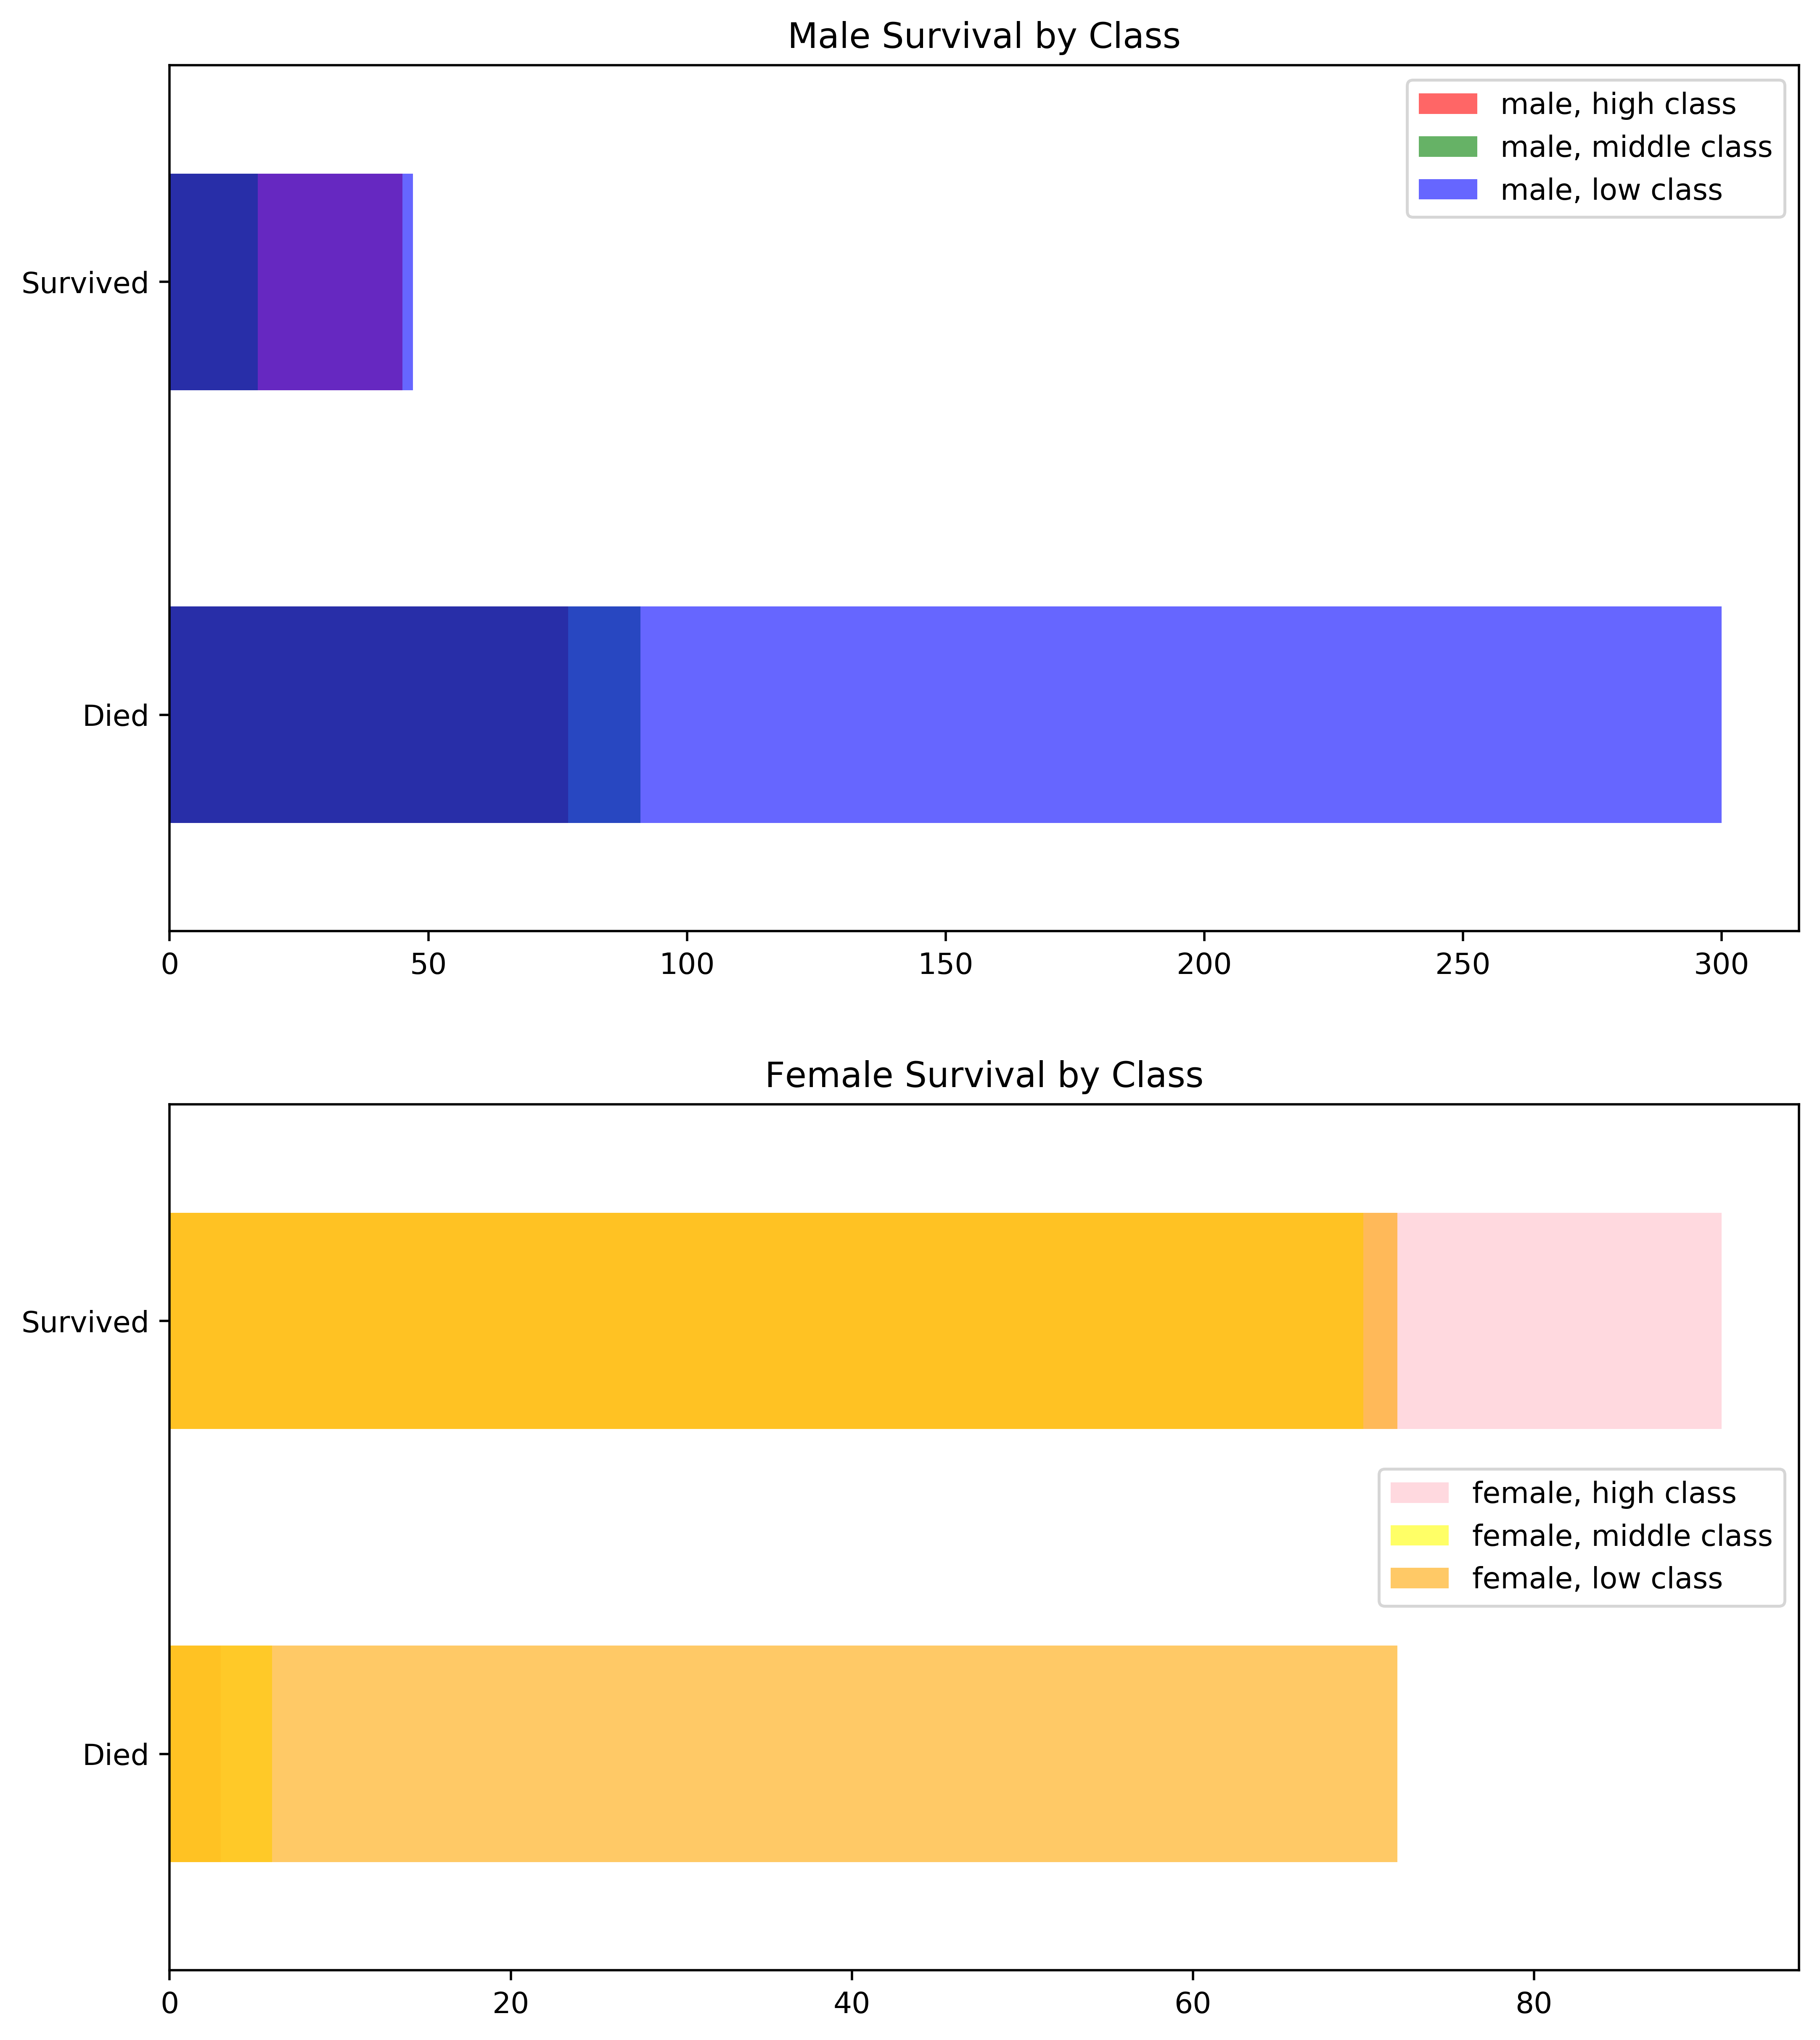

In [10]:
fig = plt.figure(figsize=(10,12), dpi=500)
                 
ax1 = plt.subplot(2,1,1)
full_data.Survived[full_data.Sex == 'male'][full_data.Pclass == 1].value_counts().sort_index().plot(kind='barh', color='red', label='male, high class', alpha=0.6)
full_data.Survived[full_data.Sex == 'male'][full_data.Pclass == 2].value_counts().sort_index().plot(kind='barh', color='green', label='male, middle class', alpha=0.6)
full_data.Survived[full_data.Sex == 'male'][full_data.Pclass == 3].value_counts().sort_index().plot(kind='barh', color='blue', label='male, low class', alpha=0.6)
ax1.set_yticklabels(['Died','Survived'])
plt.legend()
plt.title('Male Survival by Class')


ax2 = plt.subplot(2,1,2)
full_data.Survived[full_data.Sex == 'female'][full_data.Pclass == 1].value_counts().sort_index().plot(kind='barh', color='pink', label='female, high class', alpha=0.6)
full_data.Survived[full_data.Sex == 'female'][full_data.Pclass == 2].value_counts().sort_index().plot(kind='barh', color='yellow', label='female, middle class', alpha=0.6)
full_data.Survived[full_data.Sex == 'female'][full_data.Pclass == 3].value_counts().sort_index().plot(kind='barh', color='orange', label='female, low class', alpha=0.6)
ax2.set_yticklabels(['Died','Survived'])
plt.legend()
plt.title('Female Survival by Class')



## SibSp, Parch, and FamilySize

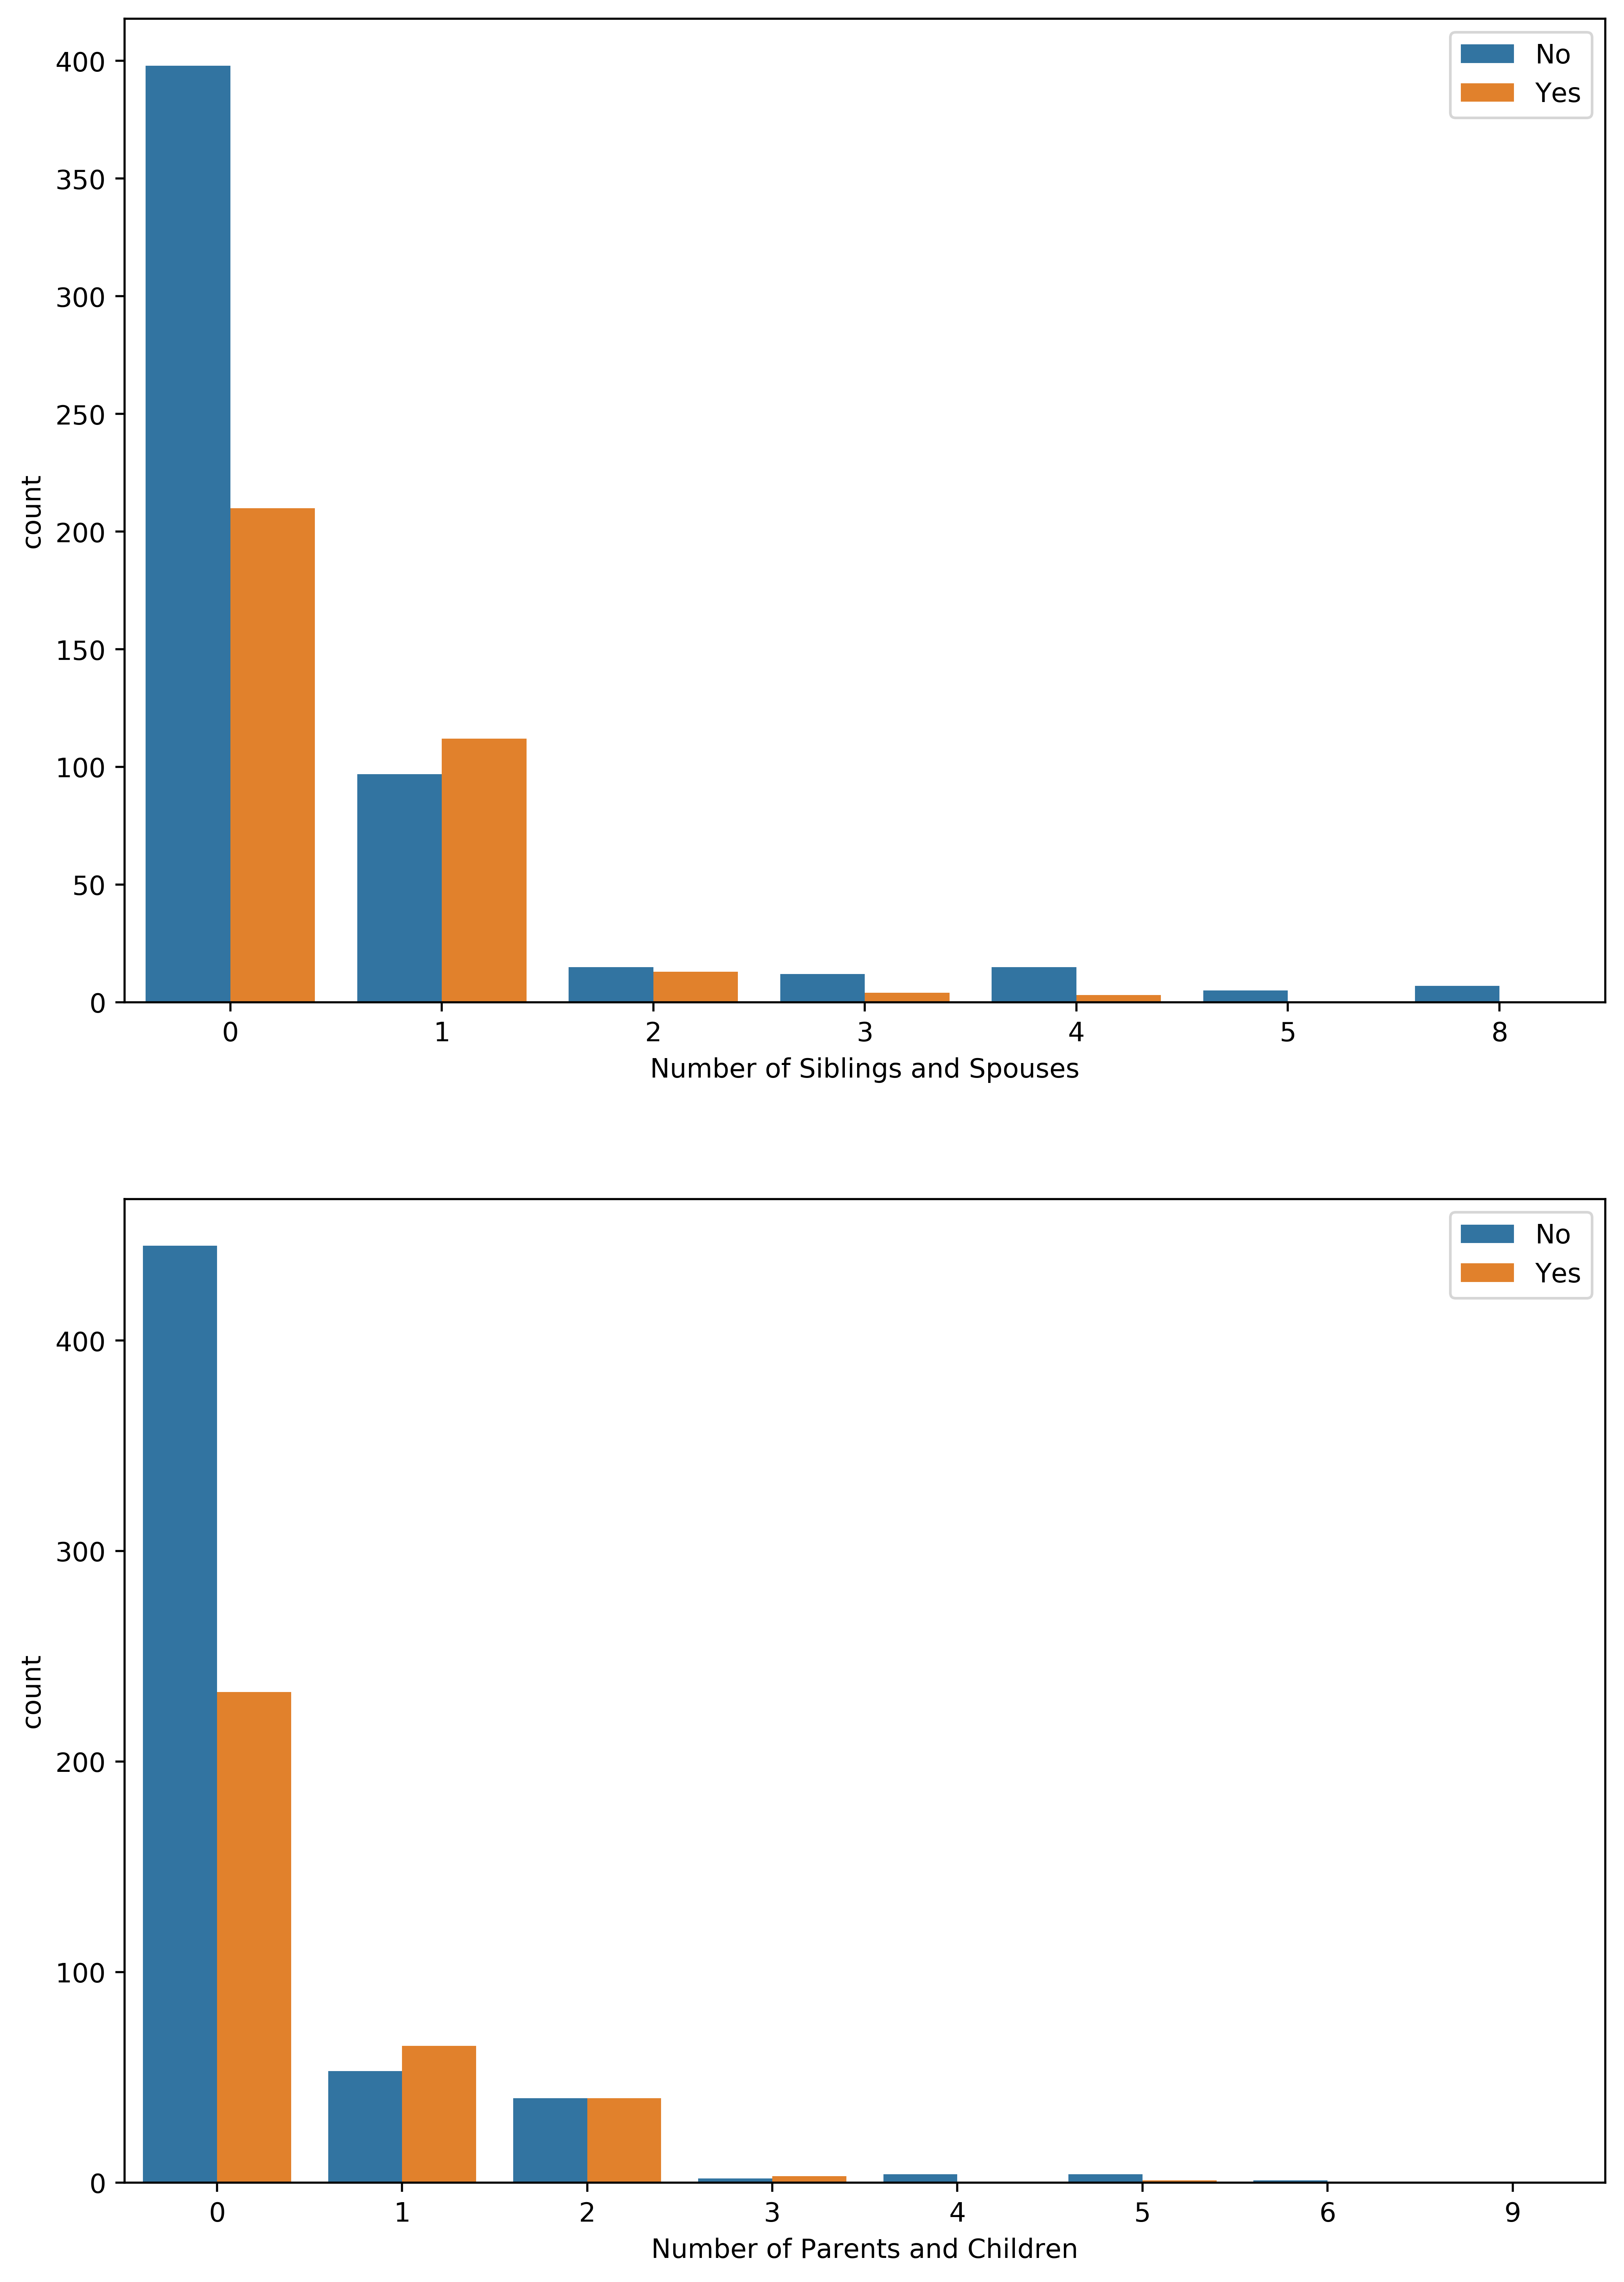

In [11]:
fig = plt.figure(figsize=(10,15), dpi=500)

ax1 = plt.subplot(2,1,1)
sns.countplot(x='SibSp', hue='Survived', data=full_data)
ax1.set_xlabel('Number of Siblings and Spouses')
ax1.legend(['No', 'Yes'], loc='upper right')

ax2 = plt.subplot(2,1,2)
sns.countplot(x='Parch', hue='Survived', data=full_data)
ax2.set_xlabel('Number of Parents and Children')
ax2.legend(['No', 'Yes'], loc='upper right')


## Embarked

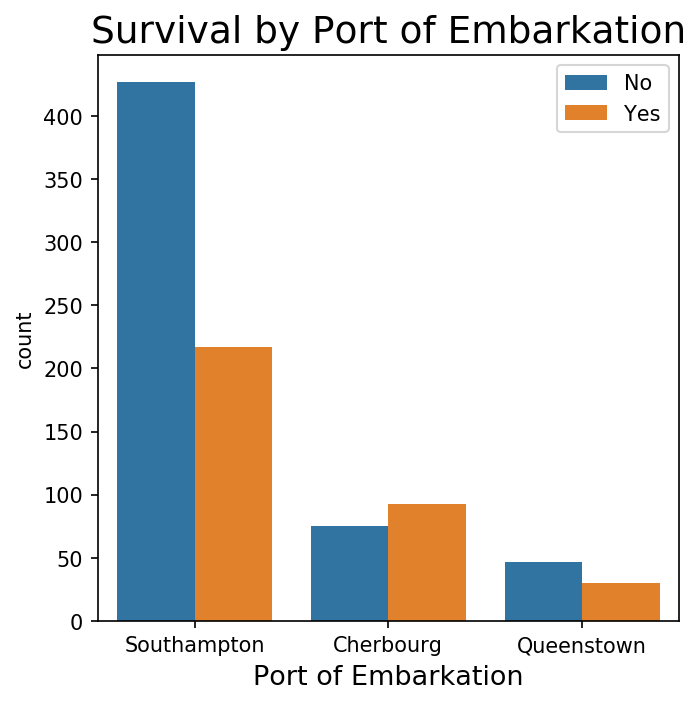

In [12]:
fig = plt.figure(figsize=(5,5), dpi=150)

ax1 = sns.countplot(x='Embarked', hue='Survived',data=full_data)
ax1.set_title('Survival by Port of Embarkation', fontdict= {'fontsize': 18})
ax1.set_xlabel('Port of Embarkation', fontdict= {'fontsize': 13})
ax1.set_xticklabels(['Southampton', 'Cherbourg', 'Queenstown'])
ax1.legend(['No','Yes'], loc='upper right')

## Fare

Text(0.5, 1.0, 'Survival by Fare')

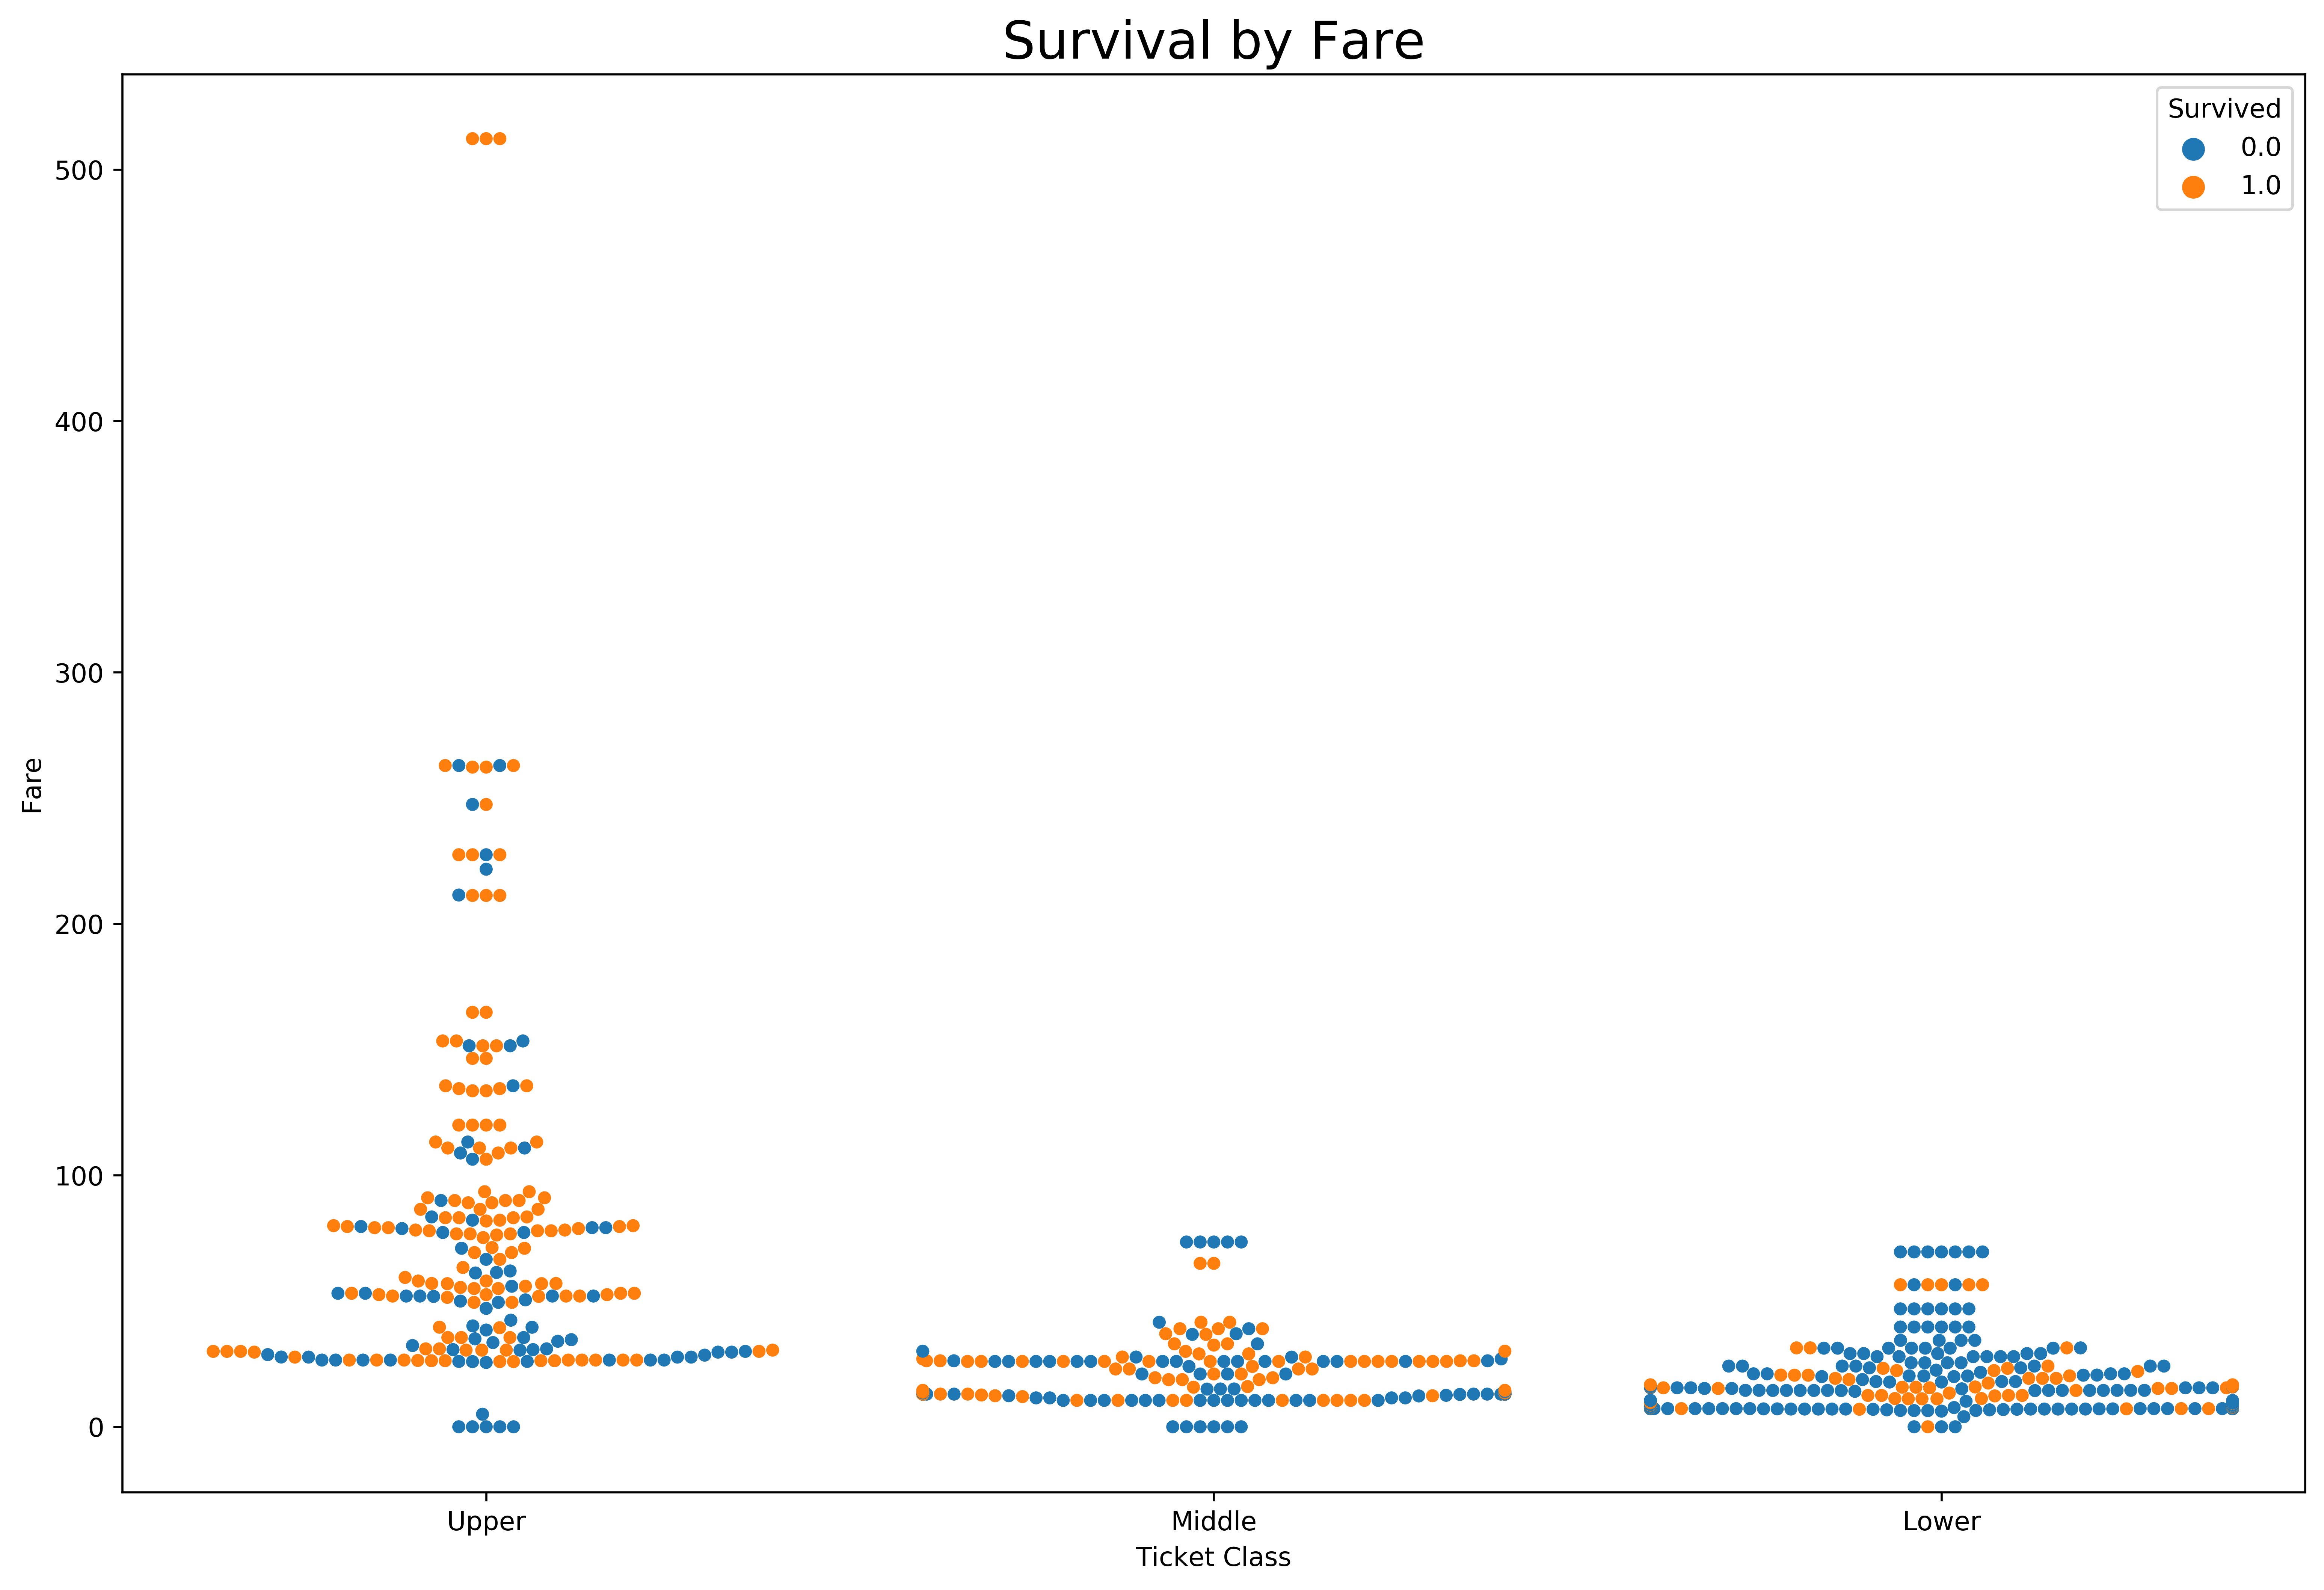

In [13]:
fig = plt.figure(figsize=(15,10), dpi=500)

ax1 = sns.swarmplot(x='Pclass', y='Fare', hue='Survived',data=full_data)
ax1.set_xlabel('Ticket Class')
ax1.set_xticklabels(['Upper', 'Middle', 'Lower'])
ax1.set_title('Survival by Fare', fontsize=20)

# 2. Feature Engineering

## Name

In [14]:
split_name = full_data['Name'].str.split(",")
titles = []
for name in split_name:
    title = name[1].split('.')[0].strip(' ')
    titles.append(title)
    
full_data['Title'] = titles
full_data.head()

Age Cabin Embarked     Fare  \
0  22.0   NaN        S   7.2500   
1  38.0   C85        C  71.2833   
2  26.0   NaN        S   7.9250   
3  35.0  C123        S  53.1000   
4  35.0   NaN        S   8.0500   

                                                Name  Parch  PassengerId  \
0                            Braund, Mr. Owen Harris      0            1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                             Heikkinen, Miss. Laina      0            3   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                           Allen, Mr. William Henry      0            5   

   Pclass     Sex  SibSp  Survived            Ticket Title  
0       3    male      1       0.0         A/5 21171    Mr  
1       1  female      1       1.0          PC 17599   Mrs  
2       3  female      0       1.0  STON/O2. 3101282  Miss  
3       1  female      1       1.0            113803   Mrs  
4       3    male      0       0.0            373450    Mr

In [15]:
print(np.sort(full_data['Title'].unique()))

['Capt' 'Col' 'Don' 'Dona' 'Dr' 'Jonkheer' 'Lady' 'Major' 'Master' 'Miss'
 'Mlle' 'Mme' 'Mr' 'Mrs' 'Ms' 'Rev' 'Sir' 'the Countess']


In [16]:
pd.crosstab(full_data['Title'], full_data['Pclass'])

Pclass          1    2    3
Title                      
Capt            1    0    0
Col             4    0    0
Don             1    0    0
Dona            1    0    0
Dr              6    2    0
Jonkheer        1    0    0
Lady            1    0    0
Major           2    0    0
Master          5   11   45
Miss           60   50  150
Mlle            2    0    0
Mme             1    0    0
Mr            159  150  448
Mrs            77   55   65
Ms              0    1    1
Rev             0    8    0
Sir             1    0    0
the Countess    1    0    0

In [17]:
pd.crosstab(full_data['Title'], full_data['Sex'])

Sex           female  male
Title                     
Capt               0     1
Col                0     4
Don                0     1
Dona               1     0
Dr                 1     7
Jonkheer           0     1
Lady               1     0
Major              0     2
Master             0    61
Miss             260     0
Mlle               2     0
Mme                1     0
Mr                 0   757
Mrs              197     0
Ms                 2     0
Rev                0     8
Sir                0     1
the Countess       1     0

### New classifications:
1. Male High Class $\longrightarrow$ male1 $\longrightarrow$ 1
    * Capt, Col, Don, Dr (if male and Pclass == 1), Jonkheer, Major, Master (if Pclass == 1), Mr (if Pclass == 1), Sir 


    
2. Female High Class $\longrightarrow$ female1 $\longrightarrow$ 2
    * Dona, Dr (if female and Pclass == 1), Lady, Miss (if Pclass == 1), Mlle, Mme, Mrs (if Pclass == 1), the Countess



3. Male Middle Class $\longrightarrow$ male2 $\longrightarrow$ 3
    * Dr (if male and Pclass == 2), Master (if Pclass == 2), Mr (if Pclass ==2), Rev
 
 
 
4. Female Middle Class $\longrightarrow$ female2 $\longrightarrow$ 4
    * Dr (if female and Pclass == 2), Miss (if Pclass == 2), Mrs (if Pclass == 2), Ms (if Pclass == 2)



5. Male Low Class $\longrightarrow$ male3 $\longrightarrow$ 5
    * Master (if Pclass == 3), Mr (if Pclass == 3)



6. Female Low Class $\longrightarrow$ female3 $\longrightarrow$ 6
    * Miss (if Pclass == 3), Mrs (if Pclass == 3), Ms (if Pclass == 3)

In [18]:
full_data['Title'] = full_data['Title'].replace(['Capt', 'Col', 'Don', 'Jonkheer', 'Major', 'Sir'], 1)
full_data.loc[(full_data.Title == 'Dr') & (full_data.Sex == 'male') & 
              (full_data.Pclass == 1), 'Title'] = 1
full_data.loc[(full_data.Title == 'Master') &  (full_data.Pclass == 1), 'Title'] = 1
full_data.loc[(full_data.Title == 'Mr') &  (full_data.Pclass == 1), 'Title'] = 1


full_data['Title'] = full_data['Title'].replace(['Dona', 'Lady', 'Mlle', 'Mme', 'the Countess'], 2)
full_data.loc[(full_data.Title == 'Dr') & (full_data.Sex == 'female') & 
              (full_data.Pclass == 1), 'Title'] = 2
full_data.loc[(full_data.Title == 'Miss') &  (full_data.Pclass == 1), 'Title'] = 2
full_data.loc[(full_data.Title == 'Mrs') &  (full_data.Pclass == 1), 'Title'] = 2


full_data.loc[(full_data.Title == 'Dr') & (full_data.Sex == 'male') & 
              (full_data.Pclass == 2), 'Title'] = 3
full_data.loc[(full_data.Title == 'Master') &  (full_data.Pclass == 2), 'Title'] = 3
full_data.loc[(full_data.Title == 'Mr') &  (full_data.Pclass == 2), 'Title'] = 3
full_data['Title'] = full_data['Title'].replace(['Rev'], 3)



full_data.loc[(full_data.Title == 'Dr') & (full_data.Sex == 'female') & 
              (full_data.Pclass == 2), 'Title'] = 4
full_data.loc[(full_data.Title == 'Miss') &  (full_data.Pclass == 2), 'Title'] = 4
full_data.loc[(full_data.Title == 'Mrs') &  (full_data.Pclass == 2), 'Title'] = 4
full_data.loc[(full_data.Title == 'Ms') &  (full_data.Pclass == 2), 'Title'] = 4


full_data.loc[(full_data.Title == 'Master') &  (full_data.Pclass == 3), 'Title'] = 5
full_data.loc[(full_data.Title == 'Mr') &  (full_data.Pclass == 3), 'Title'] = 5


full_data.loc[(full_data.Title == 'Miss') &  (full_data.Pclass == 3), 'Title'] = 6
full_data.loc[(full_data.Title == 'Mrs') &  (full_data.Pclass == 3), 'Title'] = 6
full_data.loc[(full_data.Title == 'Ms') &  (full_data.Pclass == 3), 'Title'] = 6


In [19]:
full_data.astype({'Title': 'int64'}).dtypes

Age            float64
Cabin           object
Embarked        object
Fare           float64
Name            object
Parch            int64
PassengerId      int64
Pclass           int64
Sex             object
SibSp            int64
Survived       float64
Ticket          object
Title            int64
dtype: object

In [ ]:
full_data.drop(['Name'], axis=1, inplace=True)

## Cabin and Ticket

In [20]:
cabin_df = full_data[full_data['Cabin'].notnull()]
cabin_df = cabin_df[['Cabin', 'Pclass']]
cabin_df.head()

Cabin  Pclass
1    C85       1
3   C123       1
6    E46       1
10    G6       3
11  C103       1

In [21]:
print('Known Pclass == 3 unique values: {}' 
      .format(cabin_df[cabin_df['Pclass'] ==3]['Cabin'].str[:1].unique()))

print('Known Pclass == 2 unique values: {}' 
      .format(cabin_df[cabin_df['Pclass'] ==2]['Cabin'].str[:1].unique()))

print('Known Pclass == 1 unique values: {}' 
      .format(cabin_df[cabin_df['Pclass'] ==1]['Cabin'].str[:1].unique()))

Known Pclass == 3 unique values: ['G' 'F' 'E']
Known Pclass == 2 unique values: ['D' 'F' 'E']
Known Pclass == 1 unique values: ['C' 'E' 'A' 'B' 'D' 'T']


In [22]:
# Outlier 'T' 

cabin_df[cabin_df['Cabin'].str[:1] == 'T']

Cabin  Pclass
339     T       1

### Observations
1. Cabin 
    * first letter has a range of 
        * A-E for Pclass == 1 ('T' is an outlier)
        * D-F for Pclass == 2
        * E-G for Pclass == 3 
    * has too many missing values (1014 from train and test combined) for any kind of imputing to 
        * make sense
        * avoid introducing unncessary variance and bias into the data
2. Ticket values seem very arbitrary and hold little to no significance to the analysis 



###  Dropping 'Cabin' and 'Ticket' from full_data

In [23]:
full_data.drop(['Cabin', 'Ticket'], axis=1, inplace=True)
full_data

Age Embarked      Fare  \
0     22.0        S    7.2500   
1     38.0        C   71.2833   
2     26.0        S    7.9250   
3     35.0        S   53.1000   
4     35.0        S    8.0500   
5      NaN        Q    8.4583   
6     54.0        S   51.8625   
7      2.0        S   21.0750   
8     27.0        S   11.1333   
9     14.0        C   30.0708   
10     4.0        S   16.7000   
11    58.0        S   26.5500   
12    20.0        S    8.0500   
13    39.0        S   31.2750   
14    14.0        S    7.8542   
15    55.0        S   16.0000   
16     2.0        Q   29.1250   
17     NaN        S   13.0000   
18    31.0        S   18.0000   
19     NaN        C    7.2250   
20    35.0        S   26.0000   
21    34.0        S   13.0000   
22    15.0        Q    8.0292   
23    28.0        S   35.5000   
24     8.0        S   21.0750   
25    38.0        S   31.3875   
26     NaN        C    7.2250   
27    19.0        S  263.0000   
28     NaN        Q    7.8792   
29     NaN        S    7.8958   
...    ...      ...       ...   
1279  21.0        Q    7.7500   
1280   6.0        S   21.0750   
1281  23.0        S   93.5000   
1282  51.0        S   39.4000   
1283  13.0        S   20.2500   
1284  47.0        S   10.5000   
1285  29.0        S   22.0250   
1286  18.0        S   60.0000   
1287  24.0        Q    7.2500   
1288  48.0        C   79.2000   
1289  22.0        S    7.7750   
1290  31.0        Q    7.7333   
1291  30.0        S  164.8667   
1292  38.0        S   21.0000   
1293  22.0        C   59.4000   
1294  17.0        S   47.1000   
1295  43.0        C   27.7208   
1296  20.0        C   13.8625   
1297  23.0        S   10.5000   
1298  50.0        C  211.5000   
1299   NaN        Q    7.7208   
1300   3.0        S   13.7750   
1301   NaN        Q    7.7500   
1302  37.0        Q   90.0000   
1303  28.0        S    7.7750   
1304   NaN        S    8.0500   
1305  39.0        C  108.9000   
1306  38.5        S    7.2500   
1307   NaN        S    8.0500   
1308   NaN        C   22.3583   

                                                   Name  Parch  PassengerId  \
0                               Braund, Mr. Owen Harris      0            1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                                Heikkinen, Miss. Laina      0            3   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                              Allen, Mr. William Henry      0            5   
5                                      Moran, Mr. James      0            6   
6                               McCarthy, Mr. Timothy J      0            7   
7                        Palsson, Master. Gosta Leonard      1            8   
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)      2            9   
9                   Nasser, Mrs. Nicholas (Adele Achem)      0           10   
10                      Sandstrom, Miss. Marguerite Rut      1           11   
11                             Bonnell, Miss. Elizabeth      0           12   
12                       Saundercock, Mr. William Henry      0           13   
13                          Andersson, Mr. Anders Johan      5           14   
14                 Vestrom, Miss. Hulda Amanda Adolfina      0           15   
15                     Hewlett, Mrs. (Mary D Kingcome)       0           16   
16                                 Rice, Master. Eugene      1           17   
17                         Williams, Mr. Charles Eugene      0           18   
18    Vander Planke, Mrs. Julius (Emelia Maria Vande...      0           19   
19                              Masselmani, Mrs. Fatima      0           20   
20                                 Fynney, Mr. Joseph J      0           21   
21                                Beesley, Mr. Lawrence      0           22   
22                          McGowan, Miss. Anna "Annie"      0           23   
23                         Sloper, Mr. William Thompson      0  

## Fare 

In [24]:
full_data['Fare'].fillna(full_data['Fare'].mean(), inplace=True)

## Embarked

In [25]:
full_data['Embarked'].describe()

count     1307
unique       3
top          S
freq       914
Name: Embarked, dtype: object

In [26]:
imp_mean = SimpleImputer(strategy='most_frequent')
embarked = pd.DataFrame(full_data['Embarked'])
imp_mean.fit(embarked)
imputed_embarked = imp_mean.transform(embarked)

In [27]:
full_data.drop(['Embarked'], axis=1, inplace=True)
full_data['Embarked'] = imputed_embarked

full_data['Embarked'].replace(['S', 'C', 'Q'], [0,1,2], inplace=True)
full_data.head()

Age     Fare                                               Name  Parch  \
0  22.0   7.2500                            Braund, Mr. Owen Harris      0   
1  38.0  71.2833  Cumings, Mrs. John Bradley (Florence Briggs Th...      0   
2  26.0   7.9250                             Heikkinen, Miss. Laina      0   
3  35.0  53.1000       Futrelle, Mrs. Jacques Heath (Lily May Peel)      0   
4  35.0   8.0500                           Allen, Mr. William Henry      0   

   PassengerId  Pclass     Sex  SibSp  Survived  Title  Embarked  
0            1       3    male      1       0.0      5         0  
1            2       1  female      1       1.0      2         1  
2            3       3  female      0       1.0      6         0  
3            4       1  female      1       1.0      2         0  
4            5       3    male      0       0.0      5         0

## Sex

In [28]:
full_data['Sex'] = full_data['Sex'].replace(['male', 'female'], [0,1])

## SibSp, Parch, and Family_Size

In [29]:
full_data['FamilySize'] = full_data['SibSp'] + full_data['Parch']
full_data.head()

Age     Fare                                               Name  Parch  \
0  22.0   7.2500                            Braund, Mr. Owen Harris      0   
1  38.0  71.2833  Cumings, Mrs. John Bradley (Florence Briggs Th...      0   
2  26.0   7.9250                             Heikkinen, Miss. Laina      0   
3  35.0  53.1000       Futrelle, Mrs. Jacques Heath (Lily May Peel)      0   
4  35.0   8.0500                           Allen, Mr. William Henry      0   

   PassengerId  Pclass  Sex  SibSp  Survived  Title  Embarked  FamilySize  
0            1       3    0      1       0.0      5         0           1  
1            2       1    1      1       1.0      2         1           1  
2            3       3    1      0       1.0      6         0           0  
3            4       1    1      1       1.0      2         0           1  
4            5       3    0      0       0.0      5         0           0

In [30]:
full_data.drop(['SibSp','Parch'], axis=1, inplace=True)

## Age

In [31]:
mice_df = full_data[['Age','Fare','Pclass','Sex']].astype('float')

imputed_training=mice(mice_df.values)

imputed_mice_df = pd.DataFrame(imputed_training, columns=['Age', 'Fare', 'Pclass', 'Sex'])
imputed_mice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 4 columns):
Age       1309 non-null float64
Fare      1309 non-null float64
Pclass    1309 non-null float64
Sex       1309 non-null float64
dtypes: float64(4)
memory usage: 41.0 KB


In [32]:
full_data.drop(['Age'], axis=1, inplace=True)
full_data['Age'] = imputed_mice_df['Age']

## PassengerId

In [33]:
full_data.drop(['PassengerId'], axis=1, inplace=True)
full_data.head()

Fare  Pclass  Sex  Survived  Title  Embarked  FamilySize   Age
0   7.2500       3    0       0.0      5         0           1  22.0
1  71.2833       1    1       1.0      2         1           1  38.0
2   7.9250       3    1       1.0      6         0           0  26.0
3  53.1000       1    1       1.0      2         0           1  35.0
4   8.0500       3    0       0.0      5         0           0  35.0

## Correlation Matrix

In [35]:
mask = np.zeros_like(full_data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True

plt.figure(figsize=(16,10), dpi=1000)
sns.heatmap(full_data.corr(), mask=mask, annot=True, annot_kws={"size": 15}, cmap="RdYlBu")
sns.set_style('white')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10, rotation=0)
plt.title('Correlations between Titanic Features', fontdict= {'fontsize': 20})
plt.show()

# 4. Machine Learning 

In [28]:
train = full_data[:n_train]
test = full_data[n_train:]

In [59]:
y_train = train['Survived'].values
X_train = train.drop(['Survived'], axis=1)
X_test = test.drop(['Survived'], axis=1)

scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [60]:
knn = KNeighborsClassifier()
log = LogisticRegression()
forest = RandomForestClassifier()
svc = SVC()
xgb = XGBClassifier()
ada = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
tree = DecisionTreeClassifier()

classifiers = [knn, log, forest, svc, xgb, ada, gbc, tree]
scores = []

for clf in classifiers:
    clf.fit(X_train, y_train)
    acc = cross_val_score(clf, X_train, y_train, scoring = "accuracy", cv = 10)
    scores.append(acc.mean())

In [61]:
performance = pd.DataFrame({'Model': ['K Nearest Neighbor', 'Logistic Regression', 'Random Forest', 'SVC',
                                     'XGBoost', 'AdaBoost', 'Gradient Boosting', 'Decision Trees'], 
                           'Score': scores})

performance_df = performance.sort_values(by='Score', ascending=False).reset_index(drop=True)
performance_df

Model     Score
0    Gradient Boosting  0.832797
1                  SVC  0.823808
2              XGBoost  0.814844
3   K Nearest Neighbor  0.808165
4             AdaBoost  0.806979
5        Random Forest  0.803645
6  Logistic Regression  0.802497
7       Decision Trees  0.777803

Text(0.5, 1.0, 'Classifier Algorithm Accuracy Score \n')

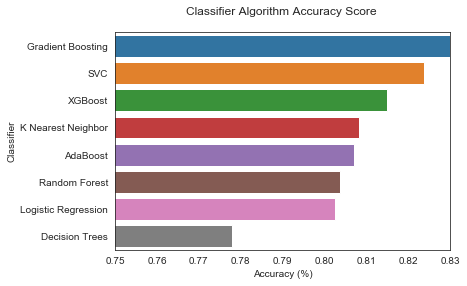

In [62]:
ax1 = sns.barplot(x='Score', y='Model', data=performance_df)
ax1.set_xlabel('Accuracy (%)')
ax1.set_ylabel('Classifier')
ax1.set_xlim(0.75, 0.83)
ax1.set_title('Classifier Algorithm Accuracy Score \n')

In [54]:
#len(X_test)

In [63]:
result = gbc.predict(X_test)

In [64]:
result_df = pd.DataFrame({'PassengerId': ID, 'Survived': result}).astype('int64')

In [69]:
result_df.head()

PassengerId  Survived
0          892       0.0
1          893       0.0
2          894       0.0
3          895       0.0
4          896       0.0

In [66]:
result_df.to_csv("prediction.csv", index=False)

# 5. Work Log

## Version 1 
1.  Ignored Cabin, Ticket, Name 
2.  Removed all entries with missing values 
3.  Used Feature Selection to create new feature "FamilyMembers"
4.  Used KNN, Random Forest, Logistic Regression, and SVC without tuning hyperparameters
    * SVC achieved the highest cross-validation score


### Did not work since kaggle does not accept solutions with missing values removed. Must Impute!

## Version 2
1.  Combined train and test sets into a single DataFrame for EDA, Visualization, and Feature Engineering
2.  Ignored Cabin, Ticket, Name 
3.  Imputed 
    * __Embarked__ with Simple Imputer 
    * __Fare__ with mean
        * Fare only has one missing value so this does not significantly reduce variance or accuracy
    * __Age__ with MICE imputer with Fare, Pclass, Sex and regressors
4.  Used Feature Selection to create new feature __FamilyMembers__
    * Removed __SibSp__ and __Parch__
5.  Added __Decision Trees__, __XGBoost__, __AdaBoost__, and __Gradient Boosting__. 
    * __Gradient Boosting__ received the highest cross-validation accuracy score
6. Did not tune hyperparameters


## Score:  0.8181

### Observations
* Need to convert both PassengerId and Survived to __int64__ for the _"prediction.csv"_
* Can extract "Title" and "Last name" from __Name__

# To Do List
1. Extract "Title" and "Last name" from __Name__  